In [6]:
import os
import numpy as np
import pandas as pd
import numpy.random as rand
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 
import folium
from folium.plugins import MarkerCluster

In [9]:
ride=pd.read_csv('rideshare.csv')

In [22]:
ride['dayofweek']=pd.to_datetime(ride['datetime']).dt.dayofweek

In [8]:
ride.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [106]:
ride_plt=ride[['cab_type','dayofweek','hour','source','short_summary']]

In [107]:
ride_plt.groupby(['cab_type','dayofweek','hour']).count()

source  short_summary
cab_type dayofweek hour                       
Lyft     0         0       2004           2004
                   1       1795           1795
                   2       2428           2428
                   3       1782           1782
                   4       1735           1735
                   5       1911           1911
                   6       2280           2280
                   7       2108           2108
                   8       1772           1772
                   9       2434           2434
                   10      2376           2376
                   11      2337           2337
                   12      2460           2460
                   13      2358           2358
                   14      2392           2392
                   15      2361           2361
                   16      2414           2414
                   17      2427           2427
                   18      2408           2408
                   19      2437           2437
                   20      2355           2355
                   21      2517           2517
                   22      2771           2771
                   23      3056           3056
         1         0       3538           3538
                   1       3010           3010
                   2       3014           3014
                   3       3083           3083
                   4       3102           3102
                   5       2998           2998
...                         ...            ...
Uber     5         18      2028           2028
                   19      2031           2031
                   20      2157           2157
                   21      2032           2032
                   22      2071           2071
                   23      2127           2127
         6         0       2033           2033
                   1       1987           1987
                   2       2161           2161
                   3       2204           2204
                   4       2077           2077
                   5       1999           1999
                   6       2053           2053
                   7       2115           2115
                   8       2096           2096
                   9       2097           2097
                   10      1999           1999
                   11      2104           2104
                   12      2119           2119
                   13      2075           2075
                   14      2050           2050
                   15      2079           2079
                   16      2106           2106
                   17      2066           2066
                   18      2088           2088
                   19      2080           2080
                   20      2152           2152
                   21      2108           2108
                   22      2048           2048
                   23      3082           3082

[326 rows x 2 columns]

In [109]:
ride_plt[ride_plt['cab_type']!='Lyft']

,cab_type,dayofweek,hour,source,short_summary
12,Uber,4,22,North End,Overcast
13,Uber,3,10,North End,Clear
14,Uber,3,19,North End,Mostly Cloudy
15,Uber,6,23,North End,Light Rain
16,Uber,4,0,North End,Overcast
17,Uber,3,19,North End,Mostly Cloudy
18,Uber,5,14,North End,Partly Cloudy
25,Uber,0,20,Beacon Hill,Mostly Cloudy
26,Uber,6,3,Beacon Hill,Clear
27,Uber,1,13,Beacon Hill,Possible Drizzle


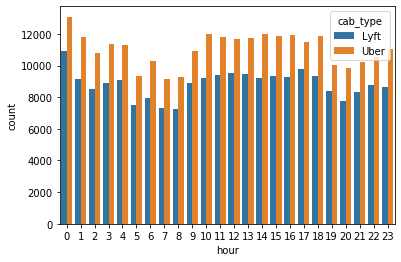

In [108]:
## Weekday Ride count 

ax=sns.countplot(x="hour", hue='cab_type',data=ride_plt[ride_plt['dayofweek'].between(1,5)])
##ax.title('Week day Ride Counts by Hour')

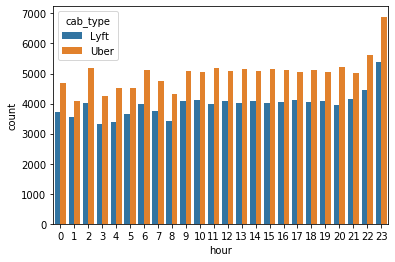

In [110]:
ax=sns.countplot(x="hour", hue='cab_type',data=ride_plt[ride_plt['dayofweek'].isin([0, 6])])

In [97]:
ride_plt[ride_plt['dayofweek'].isin([0, 6])]

,source,cab_type,dayofweek,hour,source,short_summary
0,Haymarket Square,Lyft,6,9,Haymarket Square,Mostly Cloudy
5,Haymarket Square,Lyft,0,18,Haymarket Square,Overcast
6,Back Bay,Lyft,0,5,Back Bay,Overcast
7,Back Bay,Lyft,6,19,Back Bay,Light Rain
8,Back Bay,Lyft,0,6,Back Bay,Foggy
15,North End,Uber,6,23,North End,Light Rain
19,North Station,Lyft,6,6,North Station,Clear
23,North Station,Lyft,6,16,North Station,Overcast
24,North Station,Lyft,0,7,North Station,Overcast
25,Beacon Hill,Uber,0,20,Beacon Hill,Mostly Cloudy


In [61]:
ride_plt2=ride[['cab_type','dayofweek','hour','source','short_summary','latitude','longitude']]

In [104]:
## Heat Map using Latitiude  Longitude
ride_plt

,source,cab_type,dayofweek,hour,source,short_summary
0,Haymarket Square,Lyft,6,9,Haymarket Square,Mostly Cloudy
1,Haymarket Square,Lyft,1,2,Haymarket Square,Rain
2,Haymarket Square,Lyft,2,1,Haymarket Square,Clear
3,Haymarket Square,Lyft,4,4,Haymarket Square,Clear
4,Haymarket Square,Lyft,3,3,Haymarket Square,Partly Cloudy
5,Haymarket Square,Lyft,0,18,Haymarket Square,Overcast
6,Back Bay,Lyft,0,5,Back Bay,Overcast
7,Back Bay,Lyft,6,19,Back Bay,Light Rain
8,Back Bay,Lyft,0,6,Back Bay,Foggy
9,Back Bay,Lyft,1,10,Back Bay,Light Rain


In [150]:
ride_plt_dest=ride[['cab_type','destination','hour','source','short_summary']]

TypeError: Must pass values for either `x` or `y`

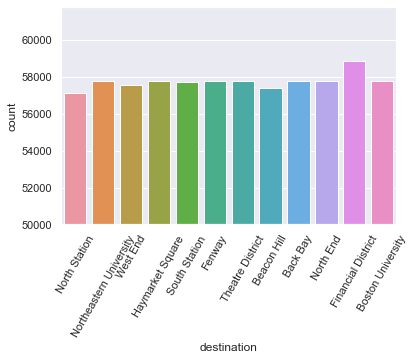

In [152]:
ax=sns.countplot(x="destination", data=ride_plt_dest)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
ax.set_ylim(50000,)
sns.countplot()

(50000, 61799.85)

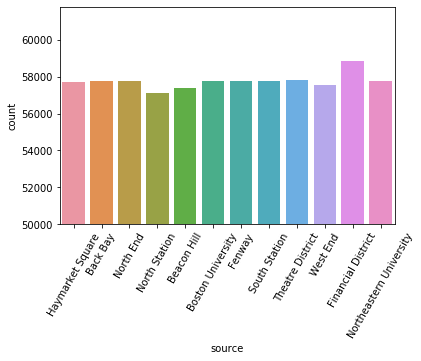

In [116]:
ax=sns.countplot(x="source", data=ride_plt)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
ax.set_ylim(50000,)
sns.countplot()

In [3]:
ride['temperatureLowTime_hour']=pd.to_datetime(ride['temperatureLowTime'],unit='s').dt.hour

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [117]:
## ApparentMinTempture vs Cab rides 

ride_plt2

,cab_type,dayofweek,hour,source,short_summary,latitude,longitude
0,Lyft,6,9,Haymarket Square,Mostly Cloudy,42.2148,-71.0330
1,Lyft,1,2,Haymarket Square,Rain,42.2148,-71.0330
2,Lyft,2,1,Haymarket Square,Clear,42.2148,-71.0330
3,Lyft,4,4,Haymarket Square,Clear,42.2148,-71.0330
4,Lyft,3,3,Haymarket Square,Partly Cloudy,42.2148,-71.0330
5,Lyft,0,18,Haymarket Square,Overcast,42.2148,-71.0330
6,Lyft,0,5,Back Bay,Overcast,42.3503,-71.0810
7,Lyft,6,19,Back Bay,Light Rain,42.3503,-71.0810
8,Lyft,0,6,Back Bay,Foggy,42.3503,-71.0810
9,Lyft,1,10,Back Bay,Light Rain,42.3503,-71.0810


In [125]:
#ride['apparentTemperatureMin_int']=ride['apparentTemperatureMin'].astype(int)
ride['apparentTemperatureMinTime_int']=pd.to_datetime(ride['apparentTemperatureMinTime'],unit='s').dt.hour
ride['temperatureMaxTime_int']=pd.to_datetime(ride['temperatureMaxTime'],unit='s').dt.hour
ride['ride_hour']=pd.to_datetime(ride['datetime']).dt.hour

In [140]:
## Are there more riders when temperatures are low
lowtemp_hr=ride[ride['ride_hour'].between(ride['apparentTemperatureMinTime_int']-1,ride['apparentTemperatureMinTime_int']+1)]##91620

In [146]:
lowtemp_hr_cnt

,ride_hour,id,timestamp,hour,day,month,datetime,timezone,source,destination,...,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,apparentTemperatureMinTime_int,temperatureMaxTime_int
0,2,1872,1872,1872,1872,1872,1872,1872,1872,1872,...,1872,1872,1872,1872,1872,1872,1872,1872,1872,1872
1,3,11870,11870,11870,11870,11870,11870,11870,11870,11870,...,11870,11870,11870,11870,11870,11870,11870,11870,11870,11870
2,4,10438,10438,10438,10438,10438,10438,10438,10438,10438,...,10438,10438,10438,10438,10438,10438,10438,10438,10438,10438
3,5,10032,10032,10032,10032,10032,10032,10032,10032,10032,...,10032,10032,10032,10032,10032,10032,10032,10032,10032,10032
4,7,1716,1716,1716,1716,1716,1716,1716,1716,1716,...,1716,1716,1716,1716,1716,1716,1716,1716,1716,1716
5,8,1871,1871,1871,1871,1871,1871,1871,1871,1871,...,1871,1871,1871,1871,1871,1871,1871,1871,1871,1871
6,9,7332,7332,7332,7332,7332,7332,7332,7332,7332,...,7332,7332,7332,7332,7332,7332,7332,7332,7332,7332
7,10,14352,14352,14352,14352,14352,14352,14352,14352,14352,...,14352,14352,14352,14352,14352,14352,14352,14352,14352,14352
8,11,14352,14352,14352,14352,14352,14352,14352,14352,14352,...,14352,14352,14352,14352,14352,14352,14352,14352,14352,14352
9,12,9360,9360,9360,9360,9360,9360,9360,9360,9360,...,9360,9360,9360,9360,9360,9360,9360,9360,9360,9360


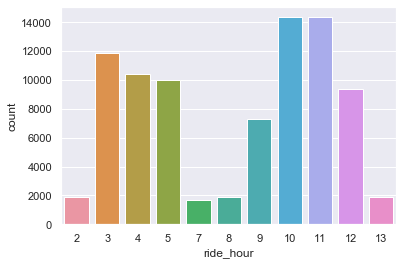

In [147]:
## People Hire more Taxis if the lowest Temperature is 9 pm to 11 pm 
## or just morning and evening 
ax=sns.countplot(x="ride_hour", data=lowtemp_hr)

In [162]:
ride['apparentTemperatureMin_int']=ride['apparentTemperatureMin'].astype(int)

In [163]:
ride['apparentTemperatureMax_int']=ride['apparentTemperatureMax'].astype(int)

In [157]:
temp_plt=ride.groupby(['apparentTemperatureMin_int']).count().reset_index()

In [164]:
temp_plt2=ride.groupby(['apparentTemperatureMax_int']).count().reset_index()

In [205]:
ride['apparentTemperatureMin_int'].min()##11
ride['apparentTemperatureMin_int'].max()##40
##ride['temperatureHigh'].min(0) 33

40

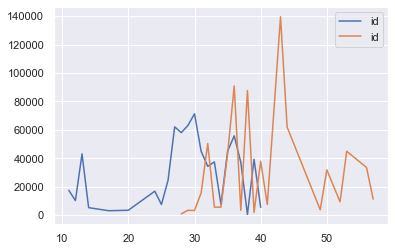

In [166]:
##ax1 = sns.lineplot(x="apparentTemperatureMin_int", y="id", data=temp_plt)
## Lot of Cab rides when temperatures are higher ##
ax1=plt.plot('apparentTemperatureMin_int', 'id', data=temp_plt)
ax2=plt.plot('apparentTemperatureMax_int', 'id', data=temp_plt2)
plt.legend()

In [22]:
import folium.plugins as plugins
sjc_m= folium.Map(location=[37.33, -121.89], zoom_start=10)

for i in range(0,len(new_sjc_r4)):
    folium.CircleMarker([new_sjc_r4.iloc[i]['latitude'], new_sjc_r4.iloc[i]['longitude']],color='red',radius=5).add_to(sjc_m)
sjc_m

NameError: name 'new_sjc_r4' is not defined

In [56]:
ride_dec17_18=ride[ride.datetime.between('2018-12-17','2018-12-18')]
#df[df.some_date.between(start_date, end_date)]

In [57]:
ride_dec17_18.head(5)# 44928

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
5,f6f6d7e4-3e18-4922-a5f5-181cdd3fa6f2,1.545071e+09,18,17,12,2018-12-17 18:25:12,America/New_York,Haymarket Square,North Station,Lyft,...,0.0221,1545066000,34.19,1545048000,40.66,1545022800,27.39,1545044400,34.97,1545080400
25,1d451059-895c-4179-8cec-40adfbc4f6d3,1.545079e+09,20,17,12,2018-12-17 20:40:09,America/New_York,Beacon Hill,South Station,Uber,...,0.0184,1545066000,34.25,1545044400,41.35,1545076800,28.40,1545044400,35.88,1545076800
29,80d2a972-2686-4edc-bc22-ddccdf211fde,1.545086e+09,22,17,12,2018-12-17 22:25:12,America/New_York,Beacon Hill,South Station,Uber,...,0.0184,1545066000,34.25,1545044400,41.35,1545076800,28.40,1545044400,35.88,1545076800
74,aa1f01a1-f54a-4978-b266-a14f877baad1,1.545037e+09,8,17,12,2018-12-17 08:50:06,America/New_York,Haymarket Square,Beacon Hill,Lyft,...,0.0221,1545066000,34.19,1545048000,40.66,1545022800,27.39,1545044400,34.97,1545080400
83,2effa2c2-6728-4274-b904-199a9fc830c4,1.545081e+09,21,17,12,2018-12-17 21:10:06,America/New_York,Boston University,North Station,Uber,...,0.0217,1545066000,34.22,1545044400,41.44,1545076800,28.61,1545044400,36.09,1545076800


In [61]:
### Daily Heat Map for Boston for Cab rides

import folium.plugins as plugins

boston_m= folium.Map(location=[42.361145,-71.057083])
boston_m

rides_arr = ride_dec17_18[['latitude', 'longitude']].as_matrix()

boston_m.add_child(plugins.HeatMap(rides_arr))
boston_m

## Daily heat Map 

/Volumes/Disk2/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



In [175]:
import folium.plugins as plugins

boston_m= folium.Map(location=[42.361145,-71.057083])
boston_m

rides_arr = ride_dec17_18[['latitude', 'longitude']].as_matrix()


for each in ride_dec17_18.iterrows():
    folium.Marker([each[1]['latitude'],each[1]['longitude']],popup=each[1]['source']).add_to(boston_m)

/Volumes/Disk2/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



In [ ]:
sns.pairplot(ride_100)

/Volumes/Disk2/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning:

invalid value encountered in greater_equal

/Volumes/Disk2/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning:

invalid value encountered in less_equal



In [ ]:
sns.heatmap(df.corr())